<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
6. Bölüm - Keşifçi Veri Analizi ve Veri Görselleştirme - Vahit Keskin anlattı. 
</font>

#### Özet

Verinin kategorik ve sayısal değişken olmasına göre istatistiksel olarak gözden geçirildi ve grafiklerle görselleştirildi. Bu işlemler için seaborn'ün planets, diamonds, tips, iris, flights, fmri veri setleri kullanıldı.

Aşağıdaki grafik türlerine baktık: 

* Dağılım Grafikleri (Barplot-kategorik, Histogram-sayısal, Boxplot-sayısal, Violin-sayısal) 
* Korelasyon Grafikleri (Scatterplot-iki sayısal, Linear-iki sayısal, Scatterplot Matrisi-çoklu sayısal)
* Heatmap (Zaman serisi, Çok sınıflı kategori) 
* Çizgi Grafik (lineplot-time point,nesnelerin interneti)
* Basit Zaman Serisi

#### Önemli Kodlar

- `df["method"]= pd.Categorical(df["method"])` yöntemiyle **object** tipinde olan değişkeni **category**ye dönüştürdük.

- `df.describe()` metoduyla veri setini istatistiksel olarak betimledik. median, mean, min, max, count değerlerini aldık. (Sadece nümerik değişkenlerin bu bilgilerini alıyoruz)

- Bize sayısal olarak verilen bazı değişkenleri **category**e dönüştürmemiz gerekebilir. (Örn. cinsiyet 1-0 olarak ifade edilmiş olabilir.)

- `df["year"] = pd.DatetimeIndex(df["year"])` metoduyla sayısal değişkeni (int, float) **datetime**'a çevirmemiz gerekir. 

- Verilerde eksik değişken olup olmadığını var olması durumunda onu doldurma yöntemlerini gördük.

- `df.select_dtypes(include = ["float64", "int64"])` koduyla istediğimiz veri tipindeki değişkenleri listeleyebiliyoruz.

- `df["method"].value_counts()` sütun içerisindeki kategorik sınıflardan her birinden kaçar tane olduğu bilgisini veriyor.

- `df["method"].value_counts().count()` sütun içerisinde kaç farklı kategorik sınıf olduğu bilgisini veriyor.

- `df["method"].unique()` koduyla sütun içerisindeki her farklı değişkenin isimlerinin listesini alıyoruz. 

- `df.pivot("month", "year", "passengers")` kodu zaman serilerinde (satırda ay, sütunda yıl, kesişimlerinde passengers olacak şekilde) tabloyu yeniden düzenlememizi sağlıyor.

- `from pandas.api.types import CategoricalDtype` `df["cut"] = df["cut"].astype(CategoricalDtype(ordered = True))` kodlarıyla nominal olan kategorik değişkeni ordinal hale çevirdik. Değişkenlerin arasında [Fair < Good < Very Good < Premium < Ideal] şeklinde bir ilişki olduğunu programa anlatabilmek için. Eğer sıralamayı istediğimiz gibi yapmazsa `category = ...(sıralamanın old. liste)` argümanını da eklememiz gerekir.

### <font color='blue'> Giriş </font>

<font color='blue'> Veri görselleştirmede en çok kullanılan kütüphaneler:
    - Matplotlib, 
    - Pandas (matplotlib üzerine kurulmuş) , 
    - Seaborn (matplotlib üzerine kurulmuş), 
    - ggplot (bu baya iyiymiş-R dünyasından geliyor), 
    - Bokeh (interaktif bir kütüphane, büyük veri setlerini ve akan veri setlerini yüksek performanslı olarak interaktif şekilde sunabilmekte. Bu arayüzleri modern web tarayıcılarla görebiliyoruz.) 
    - Plot.ly (en profesyonellerinden) 
</font>

# Veriye İlk Bakış

## Veri Seti Hikayesi ve Yapısının İncelenmesi

In [17]:
import seaborn as sns 
planets = sns.load_dataset("planets") # seabornun içinde bir dataset
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [18]:
type(planets)

pandas.core.frame.DataFrame

In [19]:
#veri setinin hikayesi nedir?

<font color='blue'> Veri seti genelde bize hazır gelmez, biz oluştururuz. Bu tabloların oluşma hikayesini bilmemiz gerekir. Örneğin; kullanıcı web sayfasında "satın al" butonuna bastıktan sonra arka tarafta tetiklenen bir dizi kayıt işlemi mi acaba tablolara kaydediliyor yoksa satın alma işlemi tamamlandığında tamamlandığını ifade etmek için mi o işlemin kaydı tutuluyor? Bu tarz detaylar da önemli. Bu şekilde veri setlerinin nasıl oluştuğunu öğrenip notlar almalı, hangi değişkenin nasıl oluştuğunu bilmemiz gerekiyor. </font>

<font color='blue'> Bu veri seti NASA'nın yayınladığı galaksi keşfi ile ilgili bir veri seti. 
- **method** galaksilerin bulunma şeklini ifade ediyor, 
- **number** bulunan galaksilerin içinde yer alan gezegen sayısını ifade ediyor, 
- **orbital_period** teknik bir ifade, yörünge dönemini ifade ediyor, (Yörünge periyodu, yörünge süresi veya orbital periyot, astronomik bir cismin yörüngesini tamamlaması için gereken süredir.)
- **mass** kütle gibi bir anlama gelmekte, 
- **distance** uzaklığı ifade ediyor, 
- **year** da tarihini ifade ediyor.   </font>

In [20]:
df = planets.copy()

In [21]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [22]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [7]:
#veri seti yapısal bilgileri

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


<font color='blue'>

- **class 'pandas.core.frame.DataFrame'** : pandas dataframe'iymiş.
- **RangeIndex** : gözlem sayısını ifade ediyor. 1035 tane gözlem birimimiz var. 
- **Data columns** : değişkenleri ifade ediyor. 

Yan taraflarda değişkenlerin veri tiplerini görüyoruz. 
**object**i kategorik değişken olarak algılayabiliriz. 
</font>

In [25]:
df.dtypes # sadece değişkenlerin bilgisini almak istiyorsam

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

<font color='blue'>Bazı fonksiyonlarda **category** tipinde istiyor object tipinde olan değişkeni. Bu yüzden dönüşüm yapıyoruz. Bazı gelişmiş fonksiyonlar biz bu tipi dönüştürmesek de kategorik değişken olduğunu anlayabiliyor.</font>

In [40]:
import pandas as pd 
df["method"]= pd.Categorical(df["method"])

In [41]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [42]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [43]:
df["method"].dtypes

CategoricalDtype(categories=['Astrometry', 'Eclipse Timing Variations', 'Imaging',
                  'Microlensing', 'Orbital Brightness Modulation',
                  'Pulsar Timing', 'Pulsation Timing Variations',
                  'Radial Velocity', 'Transit', 'Transit Timing Variations'],
                 ordered=False)

In [44]:
df["number"].dtypes

dtype('int64')

## Veri Setinin Betimlenmesi

In [45]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()

In [47]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [48]:
df.shape

(1035, 6)

In [38]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [39]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


<font color='blue'>`describe()` fonksiyonu eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır.</font>

<font color='blue'>Sayısal değişkenleri de kategorik değişkenlere dönüştürebiliyoruz. Örn. cinsiyet 1 ve 0 ile ifade edilmiş olabilir bunun kategorik değişken olması gerektiğini verinin hikayesini öğrendikten sonra anlayabiliriz.  </font>

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


<font color='blue'>Bu tablodan; 
* Keşfedilen gezegen sayısının minimum 1 maksimum 7 tane olduğunu anlayabiliyoruz. Yani number değişkeni bizim için çok fazla bilgi taşıyan, derin kendisinden sonuçlar çıkarabileceğimiz değildir yorumunu yapıyoruz. 1 ile 7 arasında sadece galaksilerin sayısını ifade ediyor. 
* **orbital_period**a baktığımızda standart sapması ortalamasına göre yüksek. 
* **mass**a baktığımızda min ve max değerleri arasında ciddi fark var, buradan "number" değişkeniyle bir ilişkisi olabileceği ihtimalini düşünüyoruz. mass'ın mean ve std'sine baktığımızda birbirlerine benzer değerlerden oluştuğunu düşündük başta fakat dağılımı biraz daha çeyreklikler gözünde değerlendirdiğimizde bunun çok da aslında birbirine benzer olmadığını gördük. Yani stdnin küçük veya meane yakın olması onun direkt homojenliğini ifade etmek adına yetmedi bize. 
* **distance**ın da min ve max değerlerini incelediğimizde kendi arasında çok yüksek bir yayılımı olduğunu görüyoruz. Çok yüksek bir standart sapması var. 
* **year** değişkeninin de standart sapmasının, meaninin alındığını görüyoruz ama aslında bu çok da doğru olmayan bir işlem. Biz burada eğer yılı zaman serisi olarak değerlendirecek olursak bu yıl değişkeninin de tipini yıl olarak düzenlememiz gerekiyor. Ama şu an zaman serisiyle ilgilenmediğimizden dolayı yıl değişkenini burada nümerik olarak bırakıyoruz.      
</font>

<font color='purple'>
Elimizde bir veri seti var. Bu veri setinin hikayesini biliyoruz ve bu veri setinin içerisindeki gözlem sayısını, değişken sayısını biliyoruz. (1035,6) ve içerisindeki değişkenlerin de artık yapılarını biliyoruz. 
    
* **number** biraz daha küçük değerlerden oluşuyor. 
* **mass** değişkeninin içerisindeki değerleri önce küçük gördük ama biraz daha yayılımın fazla olduğunu anladık. 
* **distance** değişkeninde standart sapmasının çok fazla olduğunu gördük. 
</font>

#### <font color='blue'>Kendi Çalışmam</font>

In [50]:
df["year"]

0       2006
1       2008
2       2011
3       2007
4       2009
        ... 
1030    2006
1031    2007
1032    2007
1033    2008
1034    2008
Name: year, Length: 1035, dtype: int64

In [51]:
import pandas as pd

df["year"] = pd.DatetimeIndex(df["year"])

In [52]:
df["year"]

0      1970-01-01 00:00:00.000002006
1      1970-01-01 00:00:00.000002008
2      1970-01-01 00:00:00.000002011
3      1970-01-01 00:00:00.000002007
4      1970-01-01 00:00:00.000002009
                    ...             
1030   1970-01-01 00:00:00.000002006
1031   1970-01-01 00:00:00.000002007
1032   1970-01-01 00:00:00.000002007
1033   1970-01-01 00:00:00.000002008
1034   1970-01-01 00:00:00.000002008
Name: year, Length: 1035, dtype: datetime64[ns]

#### ---

In [8]:
df.describe(include = "all").T # kategorik değişkenleri de almamızı sağlıyor. Fakat bu çok anlamlı bir şey değil.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


## Eksik Değerlerin İncelenmesi

In [53]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


####  <font color='blue'> Kendi Çalışmam </font>

In [54]:
df.isnull() # var mı?

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


In [55]:
df.isnull().values # nerede: değerler üzerinde yap sorgulamayı

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False]])

In [56]:
df.isnull().values.any() # herhangi birisinde. Bir tane bile varsa True olarak dön.

True

#### ---

In [57]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any()

True

In [58]:
#hangi değişkende kaç tane eksik değer var

In [60]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<font color='blue'> orbital_periodda 43 tane eksiklik varmış. Bu eksikliğin nasıl ortaya çıktığı incelenmeli, araştırılmalı business tarafında. </font>

#### <font color='blue'>Yöntem-1: Tüm nan değerleri "0" ile doldurabiliriz. </font>

In [63]:
df["orbital_period"].fillna(0, inplace = True)

In [64]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

#### <font color='blue'>Yöntem-2: Nan değerler yerine o columnun ortalamasını da koyabiliriz.</font>

In [65]:
df["mass"].fillna(df["mass"].mean(), inplace = True)

In [8]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [66]:
df.fillna(df.mean(), inplace = True)  # Veri setindeki tüm eksik değelerin yerine ortalamalarını koymak istediğimizde

In [67]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

<font color='blue'> Inplace'lerle yapısını bozduk veri setinin. Geri alıyoruz `df = planets.copy()` diyerek.</font>

In [68]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [69]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik Değişken Özetleri

<font color='blue'> 
Elimize gelen veriye ilk bakışımızı attığımız esnada elimizdeki sürekli değişkenleri betimsel istatistikler kavramında kısaca tanıdık ama kategorik değişkenleri de bu şekilde tanımamız gerekmektedir.Veri setimizdeki kategorik değişkenleri özel bir şekilde alıp değerlendirmek gerekir.
    
1. Kategorik değişkenleri öncelikle farketmek ve özetlerini almak gerekiyor. 
2. Kategorik değişken varsa bunların sınıfları vardır. Bu sınıfların isimlerine ve bunların sayısına erişmek gerekir.
3. Ayrıca bu sınıfların frekansına erişmek gerekir. 
    
</font>

In [42]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Sadece Kategorik Değişkenler ve Özetleri

<font color='blue'> Dataframe'in içerisinden istediğimiz tipe göre değişken seçmek için `.select_dtypes` metodunu kullanıyoruz.</font>

In [70]:
kat_df = df.select_dtypes(include = ["object"]) # eğer category'e dönüştürdüysek tipi "category" yazmamız gerekir.

In [71]:
kat_df.head(5)  # Bir tane kategorik değişken varmış.

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [72]:
df.select_dtypes(include = ["int64"])

,number,year
0,1,2006
1,1,2008
2,1,2011
3,1,2007
4,1,2009
...,...,...
1030,1,2006
1031,1,2007
1032,1,2007
1033,1,2008


<font color='blue'> Kaç farklı kategorik değişken var gözlemlemek istediğimizde `kat_df.head(10)` bize istediğimiz çıktıyı vermiyor.</font>

### Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [74]:
kat_df["method"].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

<font color='blue'> Burada bir sürü kategori sınıfı var. Bunları tek tek elle saymak yerine `count()` fonksiyonunu kullanıyoruz.</font>

In [75]:
kat_df["method"].value_counts().count()

10

### Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

<font color='blue'> Bu kategorik sınıflarının hangisinden kaçar tane var?</font>

In [58]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

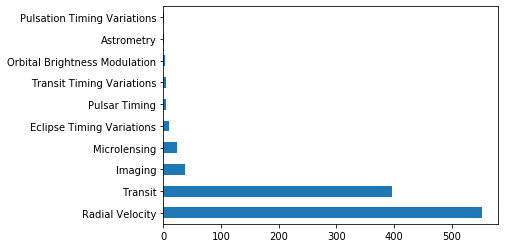

In [77]:
df["method"].value_counts().plot.barh();

<font color='blue'> `df["method"].value_counts().plot.barh();` kodunda kategorik sınıfların değerlerini grafik üzerinde gösteriyoruz.`;` baştaki "matplotlib.axes._subplots.AxesSubplot at 0x1697ed5a708" açıklamasını yok ediyor.   </font>

## Sürekli Değişken Özetleri

In [79]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [88]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [90]:
df_num.head() # sadece sürekli değişkenleri seçmiş olduk.

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [91]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [87]:
df_num["distance"].describe() # column özelinde de betimsel istatistiklerine bakabiliriz.

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

<font color='blue'> Biraz daha sunum şeklini kişiselleştirmek istersek: </font>

In [71]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count())) 
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


<font color='blue'> Aşağıdaki grafik türlerine bakacağız: 

* Dağılım Grafikleri 
* Korelasyon Grafikleri 
* Heatmap
* Çizgi Grafik
* Basit Zaman Serisi
    
 </font>

# Dağılım Grafikleri

<font color='blue'> Birinci görecek olduğumuz veri görselleştirme tekniği ana çatı yapısı dağılım grafikleri. Dağılım grafikleri elimizdeki sürekli/sayısal ya da kategorik değişkenlerin dağılımını bir standart sapma veya varyansla değil de görsel teknikler ile sunma imkanı sağlar. Büyük resmi görmemizi sağlıyor.   </font>

## Barplot (Sütun grafik)

<font color='blue'> Sütun grafik elimizdeki kategorik değişkenleri görselleştirmek için kullanılır. </font>

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

<font color='blue'> "diamonds" veri setinin genel amacı mücevherlerle ilgili bir bilgi sunmak. "color", "clarity" kalitesiyle ilişkilendirilebilir. "x", "y", "z", "depth", "table" yapısal özelliklerini ifade ediyor.  </font>

In [92]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color='blue'>Burada en önemli kabul edilebilecek değişken "price" değişkeni.</font>

**Veri Setine Hızlı Bakış**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<font color='blue'>Yaklaşık 54 bin gözlem birimi varmış,10 tane değişken(column) varmış veri setinin içerisinde. Bu değişkenlerden 3 tanesi kategorik değişken, diğer 7 tanesi ise sayısal değişkenlermiş. RAM'de tuttuğu boyut da 4 MB civarındaymış. Diğer veri setinden yaklaşık 5-6 kat daha yüksek bir boyuta sahip.</font>

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


<font color='blue'>
    
* **depth**in mean ve standart sapmasına baktığımızda çok ortalamadan uzaklaşmadığını söyleyebiliriz, min ve max'a baktığımızda da düşündüğümüzü doğruluyor. Ancak odaklandığımız konu elmas olduğu için, burada çok küçük derinlik farkları büyük anlamlara da geliyor olabilir.
    
* **table**da da değerler birbirine çok yakın.
    
* **price**'in 326 dolar ile 18 bin dolar arasında fiyatlarının değiştiğini görüyoruz, herhalde en düşük fiyatta olanlar en kötü kaliteye sahip olanlar olacaktır. Ki burada olmayan kategorik değişkenleri de göz önünde bulundurduğumuzda muhtemelen "price" değişkeninin içerisindeki varyansı, bilgiyi açıklamakta o kategorik değişkenlerin çok ciddi bir rolü olacak.   </font>

In [95]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [96]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [97]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<font color='blue'>Elimizdeki veri seti içerisindeki kategorik değişkenlerin nominal değil ordinal olduğunu gözlemliyoruz. Sınıflar arasında bir fark var kötüden iyiye. Örneğin "color" sütunundaki "J" en kötüyü, "G" en iyiyi ifade ediyor (veri hikayesinde verilmiş bu bize). "cut"ın sınıflarını incelediğimizde de en kötüden en iyiye olacak şekilde bir kategorilenme var, bir sıralama var. Dolayısıyla bizim bunu python programlama dilinde ifade etmemiz lazım. Buradaki kategorik değişkenleri sıralı (ordered) bir şekilde tanıtma işlemini yapacağız.      </font>

In [98]:
#ordinal tanımlama 
from pandas.api.types import CategoricalDtype

In [99]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

<font color='blue'>"cut" değişkenini sıralayarak, ordinal bir formatta tanımlayacağız.</font>

In [100]:
df["cut"] = df["cut"].astype(CategoricalDtype(ordered = True))

<font color='blue'>`astype` belirtilmiş olan dataframe içerisindeki kategorik değişkeni dönüştür demek ve bunu sıralı/ordinal bir şekilde yap demek. </font>

In [102]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [103]:
df["cut"].head(1) 

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

<font color='blue'>Bu bir kategorik değişkendir ve ordinal bir değişkendir bilgisini de alabiliyoruz. Fakat **dikkat!** oluşturmuş olduğu sınıfların sırasına baktığımızda doğru sıralama olmadığını farkediyoruz. Bunu engellemek için kendimiz doğru listeyi argüman olarak veriyoruz. </font>

In [104]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [105]:
df["cut"] = df["cut"].astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [106]:
df["cut"].head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

<font color='blue'>Artık sıralama doğru.</font>

<font color='blue'>Dağılım grafiğinden sütun grafik oluşturmak üzere bölüme başlamıştık ama elimizdeki veri hazır bir kütüphane içerisinden çektiğimiz halde doğru bir formda değildi. Kullanacak olduğumuz fonksiyonlara göndermek üzere hazır değildi. Ancak şu anda kategorik değişkeni görselleştirmeye hazır hale getirebildik.  </font>

#### <font color='blue'>Kendi Çalışmam</font>

In [107]:
clarity_kategoriler = ["I1","SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

In [108]:
x=df["clarity"].astype(CategoricalDtype(categories = clarity_kategoriler, ordered = True))

In [109]:
x.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF]

In [110]:
del x

#### ---

In [ ]:
#barplot

<font color='blue'>Şu an **pandas** kütüphanesini kullanarak görselleştirme yapıyoruz.</font>

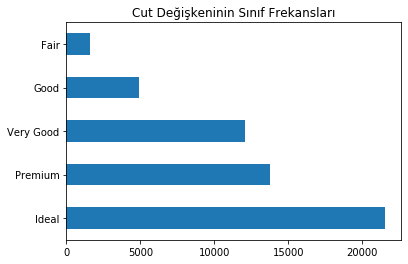

In [111]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

<font color='blue'>Kodu bu şekilde biraz daha şık gösterebiliriz. Kodu parantez içerisine aldık. Noktalardan itibaren alt satıra geçtik.</font>

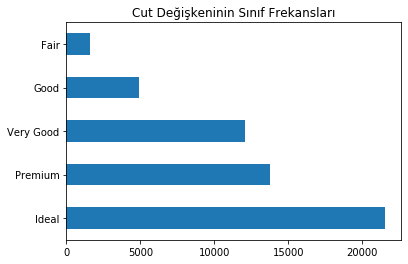

In [112]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

<font color='blue'>Genelde görselleştirme işlemlerimizi **seaborn** kütüphanesini kullanarak yapıyoruz. Grafik tekniklerine biraz daha yatkın bir kütüphane.</font>

In [113]:
df["cut"].index

RangeIndex(start=0, stop=53940, step=1)

In [114]:
df["cut"].count()

53940

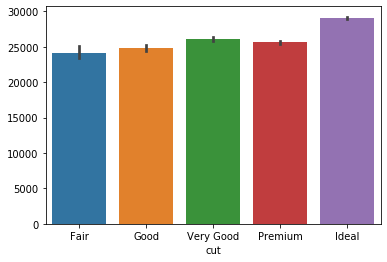

In [115]:
sns.barplot(x = "cut", y = df["cut"].index, data = df);

## Çaprazlamalar

<font color='blue'>Çaprazlama: veri seti içerisinde yer alan değişkenlerin birlikte değerlendirilmesi demek. Diğer bir ifadeyle kırılımları göz önünde bulundurmak denilebilir. Değişkenlerin etkilerinin birlikte değerlendirilmesi denebilir. Bu bölüm ele alacağımız veri görselleştirme tekniklerinin her biri veri seti üzerinde bazı veri görselleştirme tekniklerini kullanmaktan çok daha öte bu görsel tekniklerin üzerinde daha analitik anlamda somut yorumlar yapabilmek adına kullanacağımız teknikler olacaktır. Bu bölümlerde ele aldığımız yorumlamalar artık grafiklerin teknik özelliklerinin yanında bize daha detaylı veriye değil de bilgiye erişmek için kullanacak olduğumuz yaklaşımlardır.    </font>

<font color='blue'>Burada **cut** kategorik değişkeniyle **price** sayısal değişkenini çaprazlayarak bir arada değerlendirerek görselleştirme işlemini yapıyoruz.   </font>

In [116]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df["cut"] = df["cut"].astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color='blue'>`catplot` kategorik değişkenleri görselleştirmek için kullanılan bir fonksiyon. </font>

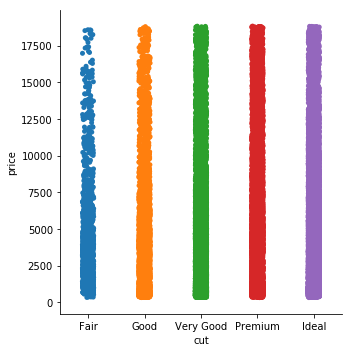

In [2]:
sns.catplot(x = "cut", y = "price", data = df);

<font color='blue'>Yukarıda iki değişkenin birbirlerine göre çaprazlanarak görselleştirmesini yapmış olduk. x ekseninde "cut" sütununa ait değişkenler, y ekseninde ise "price" sütununda yer alan sürekli değişkeni var. Minimum değeri 300 dolardı maksimum değeri 18 bin civarındaydı.</font>

<font color='blue'>"price" değişkeni içerisinde bilgi taşıyan, değişkenlik taşıyan bir değişken. Bu değişkenin içerisinde taşınan bilgiyi diğer değişkenlerin oluşturma ihtimali yüksek. Bu diğer değişkenlerce belirlenen bir bilgi olacaktır. Buna göre yukarıdaki grafiği değerlendirdiğimizde mavi noktalara odaklanacak olursak bunlar "price" sürekli değişkeninin içerisinde yoğunluk anlamında incelendiğinde daha çok 8 binler aşağısındaki noktalarında çok yoğun bir şekilde gözlemlenmiş. Ve burada kalite arttıkça "price"ın daha üst fiyatlarında daha fazla yoğunlaşmalar gözlemlenmektedir. Bu, grafiğin bize ifade ettiğiydi. Bir de bu grafiğin ifade etmediği, sakladığı bazı bilgiler var. Şimdi çaprazlama işlemlerine devam ederek bu bilgilere erişmeye çalışacağız.     </font>

<font color='blue'>Buraya bir boyut daha ekleyecek olursak (çaprazlama veya kırılım ekleme işine boyut ekleme de diyebiliriz):  </font>

<font color='blue'>"hue" argümanıyla boyut ekliyoruz. </font>

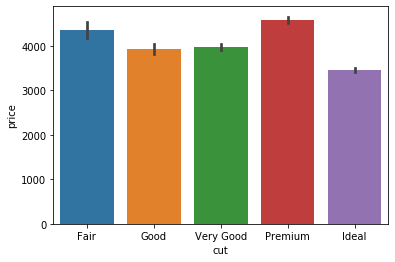

In [119]:
sns.barplot(x = "cut", y = "price", data = df);

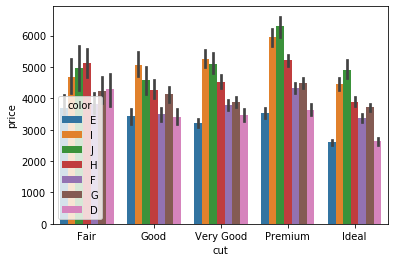

In [120]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df); # catplot yerine barplot kullandık.

<font color='blue'>Grafiğe baktığımızda "cut" kategorik değişkeni "price" kategorik değişken sınıfınca parçalara ayrılmış. Daha önce örneğin "price" ve "cut" kategorik değişkeni göz önünde bulundurulduğunda kategorik değişkenimizi sadece "Fair" sınıfında nerelerde konumlandığını görebilmiştik ama "Fair" tek renk idi. Bunun içerisine bir boyut olarak "color" eklediğimizde ise bu "color"un sınıfları arasında az önceki tek yapıyı nelerin oluşturduğu bilgisine de gidebiliyoruz. Az önceki grafiğin bizden sakladığı söylemediği bilgiye de bu şekilde çeşitlendirerek gitme imkanı bulduk.    </font>

<font color='blue'>Peki ne anlama geliyor bu? "Ideal" sınıfına bakacak olursak ilk grafikte price'ın yüksek seviyelerinde en fazla yoğun olduğunu görüyoruz, alttaki grafiğe baktığımızda ise "E" sınıfıyla, "D" sınıfı price'ın yüksek seviyelerinde oluşturduğu gruplanmada bu "Ideal" sınıfını aşağıya çektiği görülüyor. Burada gözlemlediğimiz şey aslında kategorik değişkenin tek başına değerlendirildiğinde "price"ta meydana getirdiği oluşumların aslında buraya bir boyut daha eklendiğinde ne şekilde farklılaştığı bilgisi.     </font>

<font color='blue'>Burada y değerlerinin diğer grafikten farklı olduğunu görüyoruz. Burada görmüş olduğunuz "price" eksenindeki değerler iki kategorik değişken bir arada bulunduğunda iki groupby işlemi sonrasında price değişkeninin ortalaması. Üzerine koyulan siyah çubuklar ise standart sapma değerleri (yani ortalama etrafındaki dağılımı gösteren bir ölçüt.)    </font>

<font color='blue'>Bu durumu doğrulamaya çalışacağız: </font>

In [4]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

<font color='blue'> Her bir cut'ı tek tek incelediğimizde hangi kalitede hangi rengin price'ının daha yüksek olduğunu görebiliyoruz. </font>

#### <font color='blue'>Kendi Çalışmam </font>

<font color='blue'>Diğer grafikleri anlamaya çalışıyorum.</font>

In [124]:
df.groupby(["cut"])["price"].mean()

cut
Fair         4358.757764
Good         3928.864452
Very Good    3981.759891
Premium      4584.257704
Ideal        3457.541970
Name: price, dtype: float64

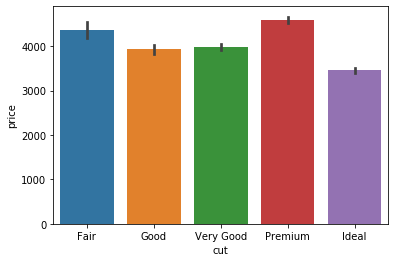

In [126]:
sns.barplot(x = "cut", y = "price", data = df);

In [127]:
df.groupby(["cut"])["price"].min()

cut
Fair         337
Good         327
Very Good    336
Premium      326
Ideal        326
Name: price, dtype: int64

In [128]:
df.groupby(["cut"])["price"].max()

cut
Fair         18574
Good         18788
Very Good    18818
Premium      18823
Ideal        18806
Name: price, dtype: int64

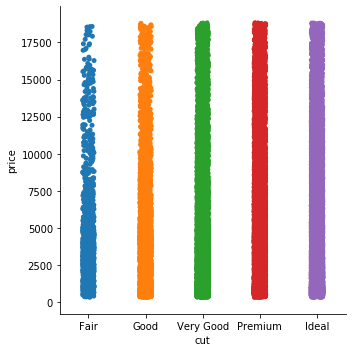

In [122]:
sns.catplot(x = "cut", y = "price", data = df);

#### ---

## Histogram ve Yoğunluk

<font color='blue'>Histogram ve yoğunluk grafikleri sayısal değişkenlerin dağılımını ifade etmek için kullanılan veri görselleştirme teknikleridir. Histogramla ve boxplotla (kutu grafik) yöntemiyle genelde sayısal değişkenlerin dağılımıyla ilgili bilgi almaya çalışacağız.  </font>

In [129]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<font color='blue'>"price" değişkenine odaklacağız. </font>

<font color='blue'>`distplot` dağılım görselleştirmek için kullanılan bir fonksiyon. `kde` yoğunluk fonksiyonunun da grafiğin üzerine koyulup koyulmamasıyla ilgili bir ayarlama. Sadece histogram oluşturmak istediğimiz için şimdilik False yapıyoruz.</font>

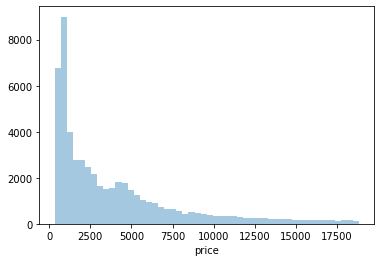

In [130]:
sns.distplot(df["price"], kde = False);

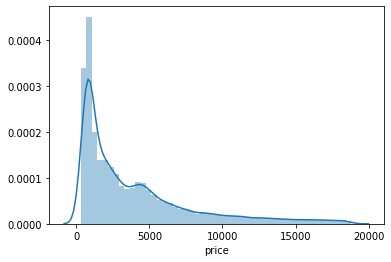

In [132]:
sns.distplot(df["price"], kde = True);

<font color='blue'>Histogram elimizdeki sayısal değişkenlerin değerlerini belirli aralıklara böler ve belirli aralıklardaki ilgili değerlerin gözlenme frekanslarını yansıtır. Örn. der ki: 0 ile 100 arasında bu kadar değer gözlenmiş vs.    </font>

In [133]:
?sns.distplot

<font color='blue'>bins: Bir histogramı oluştururken oluşturulacak olan histogramın kutuları dediğimiz sütunların aralıklarının ne olacağıdır.
</font>

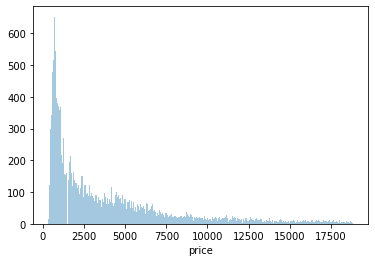

In [134]:
sns.distplot(df["price"], bins = 1000, kde = False);

<font color='blue'>`bins = 1000` yaptığımızda biraz daha hassaslaştı ve x eksenindeki değerlerin temsil edilişi biraz daha düşmüş gibi.  </font>

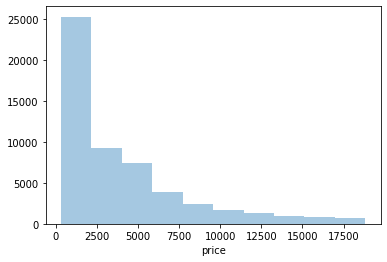

In [135]:
sns.distplot(df["price"], bins = 10, kde = False);

<font color='blue'>`bins = 10` yaptığımızda biraz daha okunması kolay bir hale geldi. "bins" bize çubuk sayısını ifade ediyor. Mesela burada 10 tane çubuk olacak şekilde grafiği oluşturdu. Bin'i küçülttüğümüzde kutuların genişliğinin artmasını, barındırdıkları değerlerin artmasını bekleriz. Örn. price'ın içerisinde 0 ile 2500 arasında bu kadar değer olduğu anlamına gelir. </font>

<font color='blue'>Grafiğe baktığımızda standart sapmasının çok küçük olmadığı anlamını çıkarabiliriz. Çarpık olduğu anlamını çıkarabiliriz çünkü 2 tepeli bir yapı ortaya çıkmış. Medyanıyla ortalaması arasında bir fark olduğu anlamını çıkarabiliriz.  </font>

In [18]:
df["price"].median()  

2401.0

In [11]:
df["price"].describe() # 50% medianı ifade ediyor.

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [3]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins, or None to use Freedman-Diaconis rule.
hist : bool, optional
    Whether to plot a (normed) histogram.
kde : bool, o

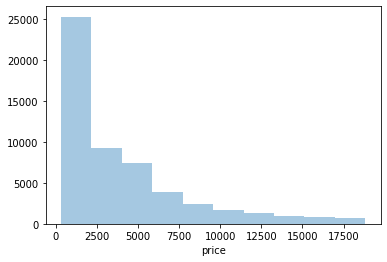

In [138]:
sns.distplot(df["price"], bins = 10, kde = False);

<font color='blue'>Histogramın üzerine bir yoğunluk grafiği yapmak istediğimizde:  </font>

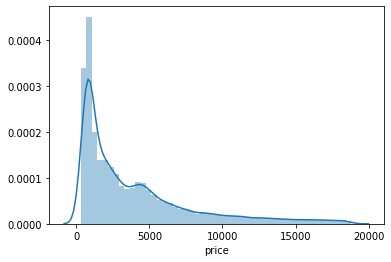

In [137]:
sns.distplot(df["price"]);

<font color='blue'>Seaborn bunu y ekseninde olasılık-yoğunluk fonksiyonunun ölçeğine göre gerçekleştirip bu ölçeğe göre indirgeyip histogramla yoğunluk grafiğini birlikte sunma imkanı veriyor.  </font>

<font color='blue'>Eğer histogram değil de sadece yoğunluk grafiğini görmek istersek `hist` argümanını False yapmamız gerekir.    </font>

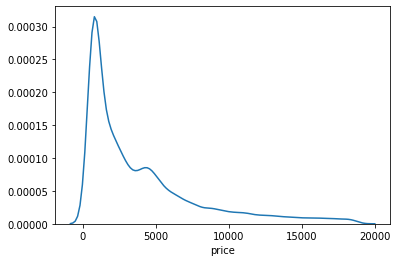

In [140]:
sns.distplot(df.price, hist = False);

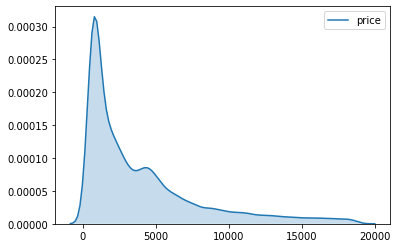

In [141]:
sns.kdeplot(df.price, shade = True); # altını boyayarak da yoğunluk grafiği alabiliriz.

## Çaprazlamalar

In [142]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


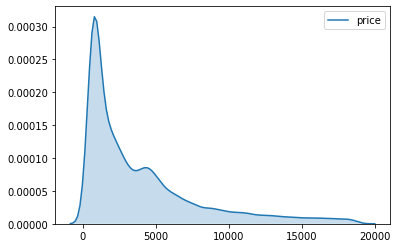

In [144]:
sns.kdeplot(df["price"], shade = True);

<font color='blue'>Yukarıdaki grafiğin bizden gizlediği şeylere bakacağız. Bu mavi alanı oluşturan nedir? Bunu sorgulamalıyız. Çünkü direkt bu grafik üzerinden bazı kararlar almak çok yanıltıcı olacaktır. Şimdiye kadarki uyarıları toparlayacak olursak sadece medyanına veya dağılımına bakmaktan ziyade bir de arka tarafta veri oluşmuş, ne oldu sorusuna yanıt aldık, betimledik. Peki bu nasıl olmuş?   </font>

<font color='blue'>
    
* FacetGrid grafik üzerine eklenen boyutları bölerek göstermek için kullanılır. 
    
* `xlim = (0, 10000))` grafiğe baktığımızda 10 binden sonra çok anlamlı gözlenebilen değerler yok. Sadece 0 ile 10000 arasındaki değişimi anlamak istiyoruz. Burayı acaba ne meydana getiriyor buna bakıyoruz.
* `sns.kdeplot` bir kdeplot grafiği oluşturacağız price'a göre fakat bunu `FacetGrid` fonksiyonunu kullanarak tüm "cut" sınıflarıyla maplemiş olacağız. 
    
    
Bir yoğunluk grafiği oluşturacağız yukarıdaki gibi. Fakat bunun üzerine boyut eklemek istiyoruz. "cut" kategorik değişkenini kullanarak. Bu durumda bu "cut" ile bu "kdeplot"ını maplememiz gerekiyor. Yani eşlememiz gerekiyor. 
    
Bilgi eklemek adına `add_legend()` fonksiyonunu giriyoruz. Grafiğin üzerine eklemiş olduğumuz "cut" kategorik değişkeninin kategorileri bilgilerini eklemek için bu fonksiyonu kullandık.
</font>

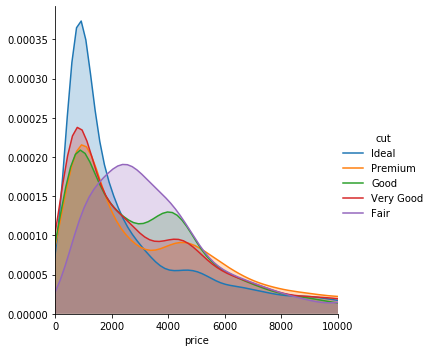

In [22]:
(sns
 .FacetGrid(df,
              hue = "cut", #cut'ı boyut olarak ekledik.
              height = 5,
              xlim = (0, 10000))  #grafiğe baktığımızda 10 binden sonra çok anlamlı gözlenebilen değerler yok.
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);

<font color='blue'>
Bu grafikte 0 ile 2000 arasında Ideal kategorisine ait diamondların fazla olduğunu,diğer tüm kategorik değişken sınıflarının aslında 6000 fiyatlanmasından sonra birbirine çok yakın frekanslarda gözlemlendiği gözüküyor.
</font>

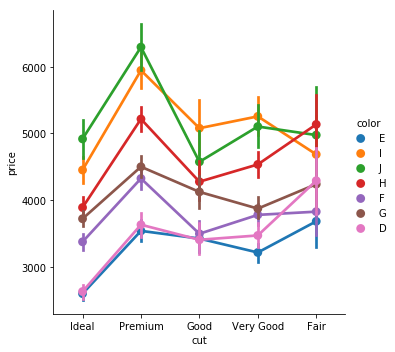

In [5]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

<font color='blue'>
Elimizde bir sayısal değişken olarak "price" ayrıca "color" ve "cut" olmak üzere iki tane kategorik değişkenimiz var. Burada fiyatın farklı seviyelerinde iki kategorik değişkenin etkilerini görebiliyoruz. "Ideal" sınıfı üzerinden düşünecek olursak color değişkeninin kategorilerinin dağılıyor olması yani birbirlerinden farklı seviyelerde gözlemleniyor olması ve birbirlerinden uzak olması şu anlama geliyor: "color" aracılığıyla "cut" değişkeni sınıfları kesişiminde birbirinden farklı bir bilgi taşındığı anlamına geliyor. Ama mesela buradaki mavi ve mor sınıfı için bu çok da geçerli değil. Örneğin "cut"ın ideal sınıfı içerisinde color'un bu iki sınıfının (mavi, mor) taşıdığı bilgi birbiriyle aynı. Ama diğer renklere geçtiğimizde yükselmiş (ideal sınıfında).
    
Makine öğrenmesinde de biz normalde price'ın içindeki değişimi diğer değişkenlerle açıklamaya çalışıyoruz. Diğer değişkenlerce price'ın açıklanma çabasının en önemli noktası ise price'ın içerisinde bu değişkenlerin ayırt edici bilgi taşıması oluyor. Makine öğrenmesinin yaptığı işi biz şu anda insan olarak yapıp algılamaya çalışıyoruz. 
    
Ayırt edicilik ne demek?: Ideal sınıfında farklı renklerin farklı değerler oluşturmuş olması burada color'ın cut ile kesiştirildiğinde ideal sınıfı altında ayırt edici bir bilgi taşıdığı anlamına geliyor. 
    
price tarafındaki değerler groupby.mean() ile alınan değerler. Çubuklar da standart sapmayı ifade ediyor. 
    
</font>

## Boxplot

<font color='blue'>
Bir sayısal değişkenin dağılımı incelenmek isteniyorsa mutlaka bir histogramla beraber bir kutu grafinin de anlaşılması lazım.
</font>

### Veri Seti Hikayesi

<font color='blue'>
Bir restorandaki bazı eylemler sonucu oluşan bir veri seti.
</font>

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

<font color='blue'>
Bu veri setinde ne önemli olabilir, neye odaklanılabilir? Yemeğin toplam fiyatı olabilir, bahşiş olabilir.
</font>

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe().T   # nümerik değere sahip olan değişkenler sadece

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<font color='blue'> 
- Acaba yemek yiyen kişi sayısının daha fazla olduğu durumlarda bahşiş ödenmesi durumu incelenirse daha fazla kişi bir araya geldiğinde bu bahşiş verme eğilimi nasıl oluyor?
- Yemek yiyen grupta sigara içen kişi olması/olmaması durumu göz önünde bulundurulduğunda bunun bahşişlere yansıması durumu nasıl oluyordur?
- Cinsiyetin kadın olması bahşiş durumunu nasıl etkiliyordur?
</font>

<font color='blue'> 
Kategorik değişkenleri tanıyoruz.
</font>

In [5]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [6]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [7]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [8]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot

In [9]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


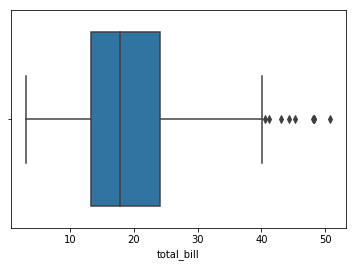

In [3]:
sns.boxplot(x = df["total_bill"]);

<font color='blue'> Boxplot bize kartiller aracılığıyla çok değerli bilgi sunan görselleştirme tekniğidir. En alttaki değer minimum değeri ifade ediyor, veriyi küçükten büyüğe sıraladığımızda kutucuğun en solu %25'lik tarafı, ortasındaki çizgi %50'lik tarafı, en sağı %75'lik tarafı ifade ediyor. En sağdaki nokta da maksimum değeri ifade ediyor. 40-50 arasının gösterilme şekli neden farklı? Baxplot bize bir değişkenin yapısını anlamaktan öte bir değerin aykırı değer olarak tanımlanması için bize en fazla yardımı dokunacak olan göstergelerden biridir. 40-50 arası aykırı değer yani.   </font>

<font color='blue'> Bu şekli dikey olarak almak istersek: </font>

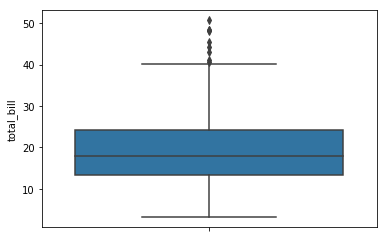

In [4]:
sns.boxplot(x = df["total_bill"], orient = "v");

## Çaprazlamalar

<font color='blue'> Bu sefer baştan belirlenmiş bazı soruları yanıtlamak üzere ele alacak şekilde ilerleyeceğiz. Soru şu: hangi günler daha fazla kazanıyoruz? Çalışmanın başında sorulabilecek sorular soru setleri gibi bir soru seti hazırlayıp bu konunun içerisine girmiş olmamız beklenir.  </font>

In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
#Hangi gunler daha fazla kazanıyoruz?

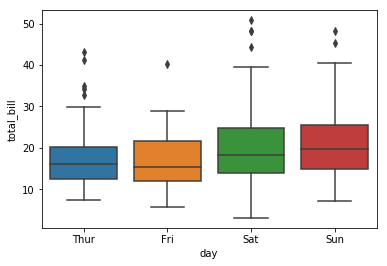

In [8]:
sns.boxplot(x = "day", y = "total_bill", data = df);

<font color='blue'> Bu boxplot bilgisiyle elimizde çizgilerin orta değerleri var. Yani sadece groupby çekip ortalamalarına baksaydık bir bilgi edinebilecektik ama bir de median değerlerini de aldık, dağılımlarını da aldık, günlerin kendi içindeki aykırı değerlerini de aldık. Yukarıda tek kutuda aldığımız bilginin arka tarafta nasıl oluştuğu bilgisini almış olduk.   </font>

In [3]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<font color='blue'> Cumartesi günü daha fazla yemek yenmesine rağmen Pazar günü bırakılan ücret daha fazla. Müşteri sayısı önemlidir evet ne kadar müşteri varsa o kadar çok para bırakılır ama burada öyle bir durum söz konusu ki Pazar günü gelen müşteriler daha fazla para bırakmış. Belki de Pazar günleri insanlar daha özel buluşmalar yapıyor.    </font>

In [ ]:
#sabah mı akşam mı daha çok kazanıyoruz?

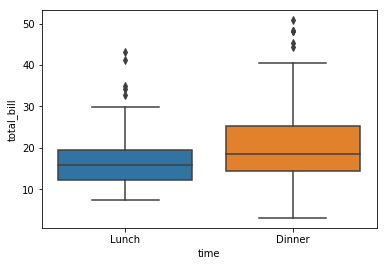

In [9]:
sns.boxplot(x = "time", y = "total_bill", data = df);

<font color='blue'> Akşam yemeklerinde daha fazla para kazandıklarını gözlemleyebiliyoruz. Bu durumda restorantın sahibi olarak şunu yapabilirim. İş yerinde bulunan en kaliteli, en deneyimli, müşterilerle ilgilenmesini bilen garsonları genellikle hafta sonları ve akşamları istihtdam ederim. Gerekirse hafta içi bir gün komple çalışma, diğer hafta içi bir gün de yarım gün çalışma ama Pazar günü tam gün burada ol, Cumartesi gecesi burada ol şeklinde.   </font>

<font color='blue'> Gruba gelen kişi sayısıyla kazancın doğru orantılı olup olmadığına bakıyoruz. </font>

In [ ]:
#kisi sayısı kazanc

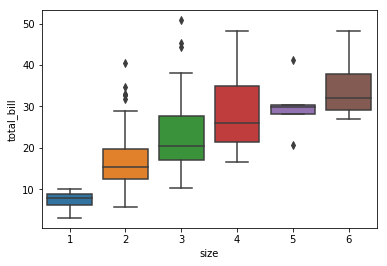

In [10]:
sns.boxplot(x = "size", y = "total_bill", data = df);

<font color='blue'> Bir tane kategorik değişken kırılımı daha ekliyoruz.  </font>

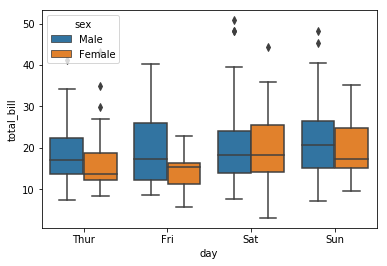

In [11]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

<font color='blue'> Cumartesi günü dışında hep erkekler daha fazla ödemiş. Mediana göre değerlendiriyoruz.  </font>

## Violin

<font color='blue'> Violin grafiği bize biraz daha dağılım anlamında bize bilgi sunar. Yoğunluk grafiğiyle kutu grafiğinin kesişimi gibi düşünülebilir. </font>

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


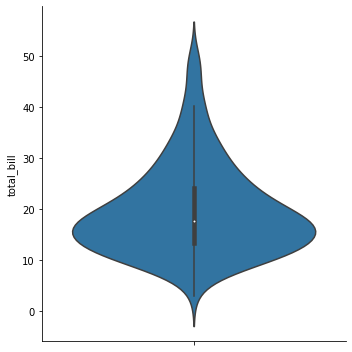

In [5]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

<font color='blue'> Yoğunluk grafiğinin ekseni çevrilmiş ve boxplotın köşelere göre hassasiyeti artırılmış şeklinde düşünebiliriz. Bu grafik bize merkezlerdeki konumlanmaları, aynı zamanda ortasında boxplot benzeri bir grafikle de medianıyla da ilgili bir bilgi sunan grafik.   </font>

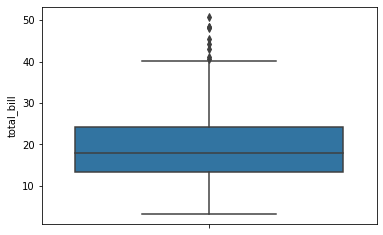

In [6]:
sns.boxplot(x = df["total_bill"], orient = "v");

<font color='blue'> Ortadaki çizgi medianı ifade ediyordu. Alt ve üstünde kalan alanlar çeyreklikleri ifade ediyordu. Burada da benzer şekilde ikisini bir arada gözlemleyebiliyoruz. Violin grafik tercihen kullanılabilir ama diğer 2 grafik mutlaka kullanılmalıdır sayısal değişkenler incelendiğinde. </font>

## Çaprazlamalar

<font color='blue'> Gün boyutu ekleyeceğiz az önceki grafiğimize.</font>

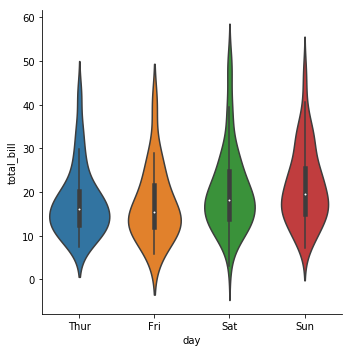

In [14]:
sns.catplot(x= "day", y = "total_bill", kind = "violin", data = df);

<font color='blue'> Bir kırılım daha eklersek: hem günlere hem de cinsiyete göre bir çaprazlama yapalım. Elinizde bir kazanç var diyelim bir de bunun cinsiyet kırılımına bakalım denilir iş ortamında.</font>

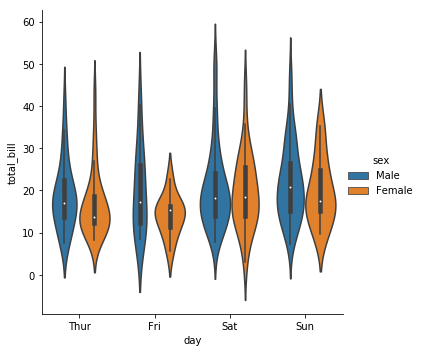

In [15]:
sns.catplot(x= "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

# Korelasyon Grafikleri

<font color='blue'>Korelasyon değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terimdir. </font>

## Scatterplot

<font color='blue'>Scatterplot, istatistiksel bir teknik olan korelasyon analizinin görsel halidir. İstatistiksel bir ölçüt olması onun üzerine iş kararlarını bilimsel anlamda alma imkanı sağlar. Veriye dayalı karar alın mottosunun aslında dayandığı şey istatistik teorisidir. Scatterplot gibi, korelasyon gibi, hipotez testleri gibi testlerdir. Fakat bazı çaprazlamalar ile detayında bu verinin nasıl oluştuğunun anlaşılmaya çalışılmalıdır. </font>

<font color='blue'>Korelasyon grafikleri arasında en fazla bilineni scatterplot (saçılım) grafiğidir. Scatterplot sayısal değişkenler arasındaki ilişkiyi gösterir. Yani iki değişken bir arada değerlendirildiğinde veri setinin içerisinde ortaya çıkan yapı hakkında bize bilgi verir.  </font>

<font color='blue'>Bu bölüme kadar değişkenleri tek bir değişken olarak ele aldık. Yani elimizde tek bir değişken vardı. Bu değişkenin tipine bakıyorduk. Bu değişken kategorikse sütun grafik kullandık (barplot), eğer bu değişken sayısal ise histogram, boxplot ve violin grafiklerini ele aldık. Bunlara eklemiş olduğumuz ikinci, üçüncü değişkenler boyut anlamında, çaprazlama anlamında yapılan eklemelerdi. Bu bölümde ise iki sayısal değişkenin birlikte oluşturdukları yapıları değerlendireceğiz. Ve yine bunun üzerine boyut olarak üçüncü, dördüncü değişkenleri vs. de ekleyerek arka tarafta oluşan bilginin detaylarına erişeceğiz.   </font>

<font color='blue'>Öncekilerinde de birden fazla değişkeni ele alıyorduk ama burada aynı anda bir arada değerlendirilmeleri söz konusu. </font>

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<font color='blue'>Hem x'e hem y'ye sayısal değişkenimizi yazıyoruz. </font>

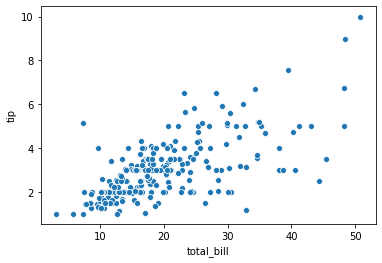

In [2]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

<font color='blue'>Grafiğe baktığımızda toplam ödenen hesap arttıkça bahşişlerde bir artma gözlenmiş.  </font>

## Çaprazlamalar

<font color='blue'>Öncelikle bir kategorik değişkeni boyut olarak ekliyoruz.</font>

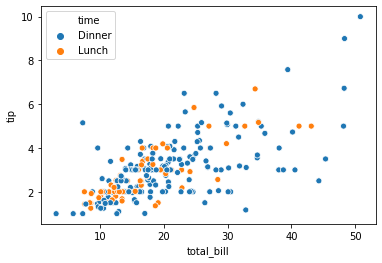

In [3]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

<font color='blue'>Time'ı boyut olarak eklediğimizde akşam yemeklerinde ödenen hesap arttıkça bahşişin de artmasının gözlemlenmesi biraz daha devam etmiş, fakat bu lunch için bu şekilde değil.  </font>

<font color='blue'>Noktaların renkleriyle beraber tiplerini de değiştirmek istiyoruz diyelim. `style = "time"` ekledik. "time" kategorik değişkeninin özelliğine göre sınıflarına göre farklı bir simge koyması gerektiğini anlıyor.   </font>

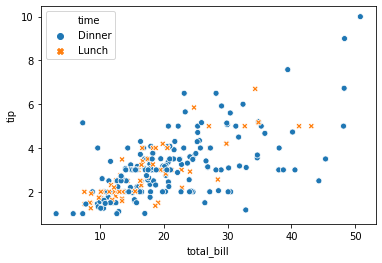

In [4]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

<font color='blue'>Aynı işlemi farklı bir değişken ile gözlemleyelim. </font>

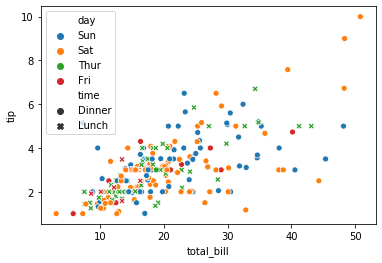

In [5]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

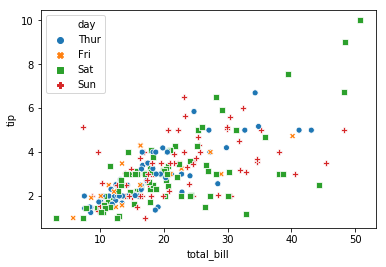

In [8]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df);

<font color='blue'>Sürekli değişkeni boyut olarak eklemek istersek:</font>

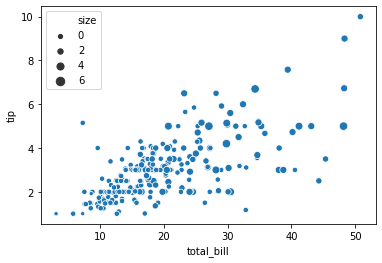

In [6]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = df);

<font color='blue'>Burada dairenin boyutuna göre bir gösterim yapıyor. Renklendirme de yapmak istediğimizde boyut ekler gibi yapıyoruz.`hue= "size"` </font>

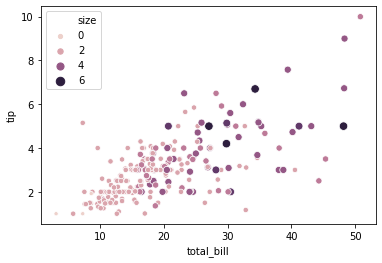

In [7]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

## Doğrusal İlişkinin Gösterilmesi

<font color='blue'> Scatterplot iki sayısal değişken arasındaki ilişkiyi bir grafik aracılığıyla sunmuştu. Bu saçılım aracılığıyla sunulan bilgiyi bir de bir doğru aracılığıyla temsil edebiliyoruz. </font>

In [8]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
import matplotlib.pyplot as plt # bu bölüme özel olarak import ettik.

<font color='blue'> matplot library'nin bütün fonksiyonlarını değil de sadece matplotlib içerisindeki pyplot isimli fonksiyonu ben import etmek istiyorum çalışmaya. </font>

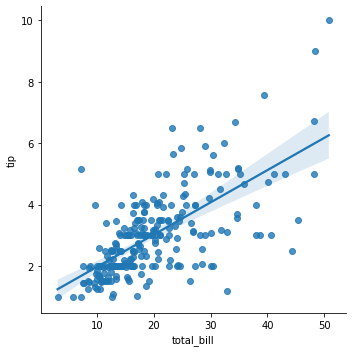

In [10]:
sns.lmplot(x = "total_bill", y = "tip", data = df);  #lm: linear model

<font color='blue'> Doğrunun etrafındaki açık renk maviler bu doğru etrafındaki sapmaları ifade ediyor. Aşağıda ve yukarıda noktaların uzaklıklarından kaynaklı standart hatayı artıracağından dolayı sapmalar bu şekilde ifade edilmiş.  </font>

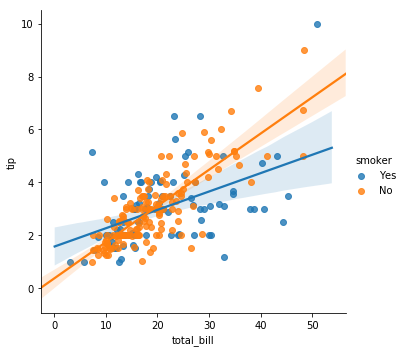

In [6]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

<font color='blue'> Sigara içme durumunu ifade eden bir kırılım eklemek istediğimizde doğruların eğimi değişti. Bu doğruların eğimi grafik hakkında yapacağımız yorumların şiddetini ifade eder. Eğer bizim doğrumuz turuncudaki gibiyse bu durumda şunu deriz: çok şiddetli bir şekilde ödenen hesap arttıkça bahşişler artmaktadır. Bu durumu sigara içmeyenler için yapabiliyoruz. Sigara içenler göz önünde bulundurulduğunda bu artışın şiddetinin bu kadar fazla olmadığını görüyoruz.     </font>

<font color='blue'>Arada bir korelasyon görüyoruz ama bu korelasyon anlamlı mı bunların da testlerinin yapılması gerekiyor. Tamamen bilimsel bir formatta veri biliminin "bilim" kısmı dediğimiz tarafıyla burada gözlemlemiş olduğumuz ayrıştırıcılıklar, değişkenin üzerindeki değişkenliği açıklayacak olan farklılıkların bir de anlamlı olup olmadığını değerlendirerek bunları daha bilimsel bir formatta ilerletmiş olacağız.   </font>  

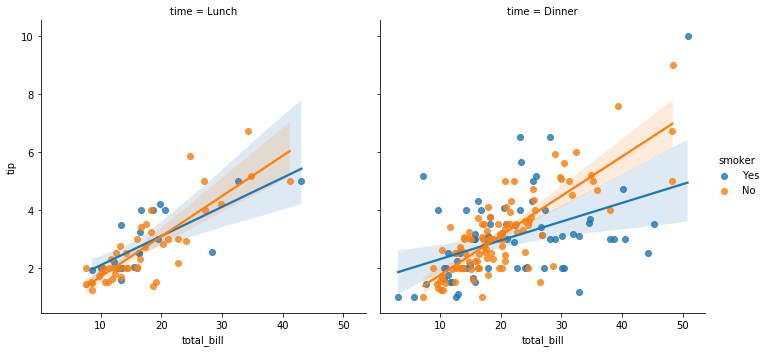

In [11]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

<font color='blue'> `col` argümanı verilen değişkene göre farklı grafiklere ayırıyor grafiği. Burada öğünlere göre de eğimlerin nasıl değiştiği gözlemlenebiliyor.</font>

<font color='blue'> Bir boyut daha eklemek istediğimizde `row = "sex"` ekliyoruz. Satırlara göre cinsiyeti, sütunlara göre de time'ı okumamız gerekiyor bu yazdığımız koda göre. </font>

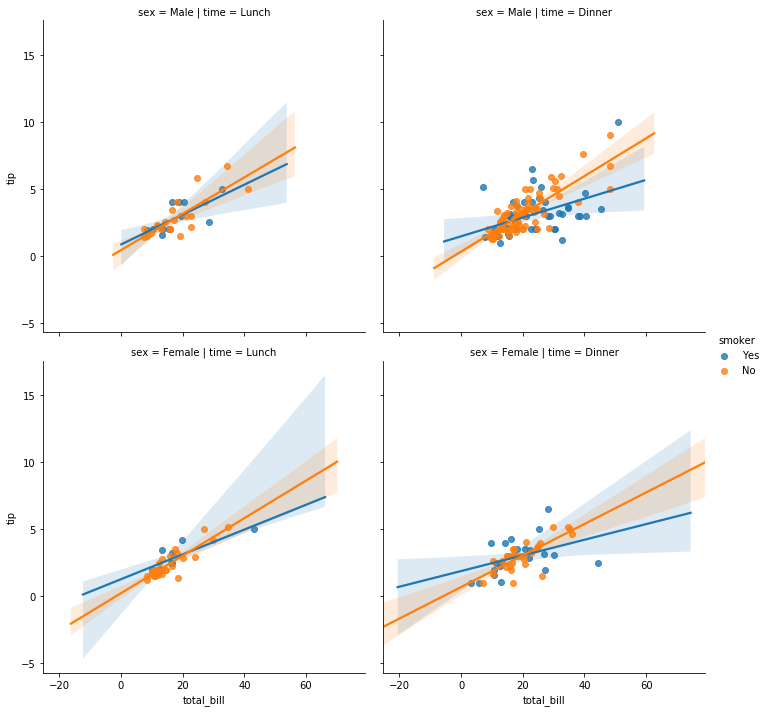

In [8]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

<font color='blue'> Biz bunları kabaca tanıyıp algoritmalara gönderdiğimizde, algoritmanın aslında bulacak olduğu ayrıştırmalar açıklayacak olduğu değişimlerin bizde ne şekilde oluştuğu bilgisine hakim olmuş oluyoruz. Dolayısıyla "kapalı kutu" dediğimiz bazı modeller kullanıldığında buradan çıkarılacak olan sonuçlardan ziyade bir veri analisti, bir veri bilimci olarak sürecin tamamen içindeyiz.    </font>

## Scatterplot Matrisi

<font color='blue'> Veri setindeki tüm sayısal değişkenler arasındaki ilişkiyi matris formunda ifade etmemize yarıyor.</font>

In [13]:
import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<font color='blue'> "iris" data setinin içerisinde bazı çiçek türleri var. Bu çiçek türlerinin özelliklerini ifade eden değişkenler var. Yapraklarıyla ilgili uzunluk, genişlik vs.</font>

In [14]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<font color='blue'> Kategorik değişkenimiz olan "species"in sınıfları arasında bir fark olmadığından (nominal tipte olduğundan) object olarak kalabilir.  </font>

In [15]:
df.shape

(150, 5)

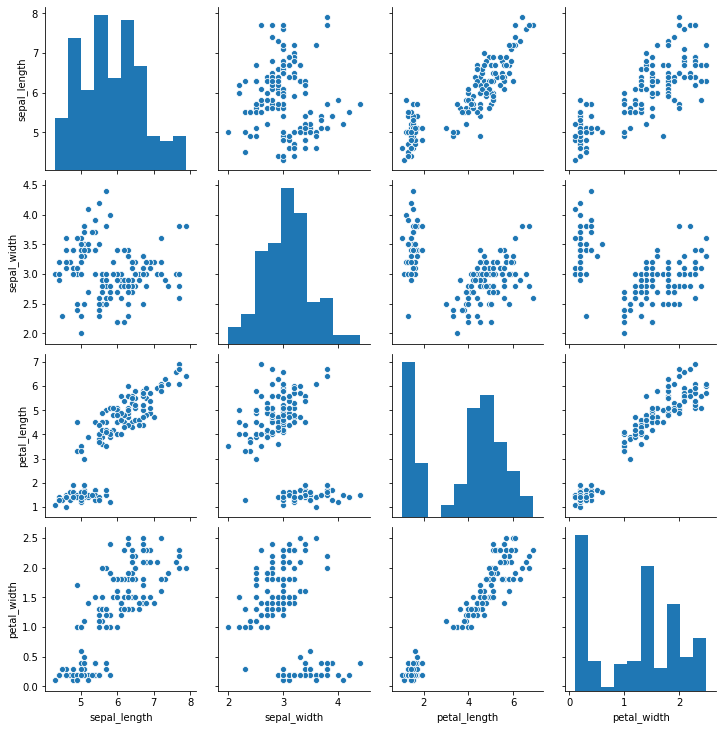

In [18]:
sns.pairplot(df);

<font color='blue'> Bu grafiğin bize sunduğu iki bilgi var: 1. bilgi eksende yer alan grafikler. Bunlar veri seti içerisinde yer alan değişkenlerin dağılımlarını ifade ediyor (çubuk şeklinde olan grafikler). Diğer sunduğu bilgi ise eksenlerden yapılan kesiştirmeler ile değişkenlerin arasındaki ilişkinin sunulması. Örneğin "sepal_length" değişkeni ile "petal_width" değişkeni arasındaki ilişki ifade edilmiş. Scatter plot görsellerinde eğer oluşturulmuş olan grafik bir toz bulutu şeklindeyse veya yapısal bir formu yoksa bu iki değişken arasında bir ilişki olmadığı anlamına gelir. Bir diğer önemli bilgi: oluşturulan scatter plot içerisinde gözlem noktaları incelendiğinde bunlar eğer birbirlerinden farklı köşelerde kümeleniyorsa çaprazlama durumuyla gözlemleyebilecek olduğumuz bazı alt gruplar vardır. Bunların göz önünde bulundurulması gerekir.      </font>

<font color='blue'> Bir kategorik değişkeni buraya boyut olarak ekliyoruz:</font>

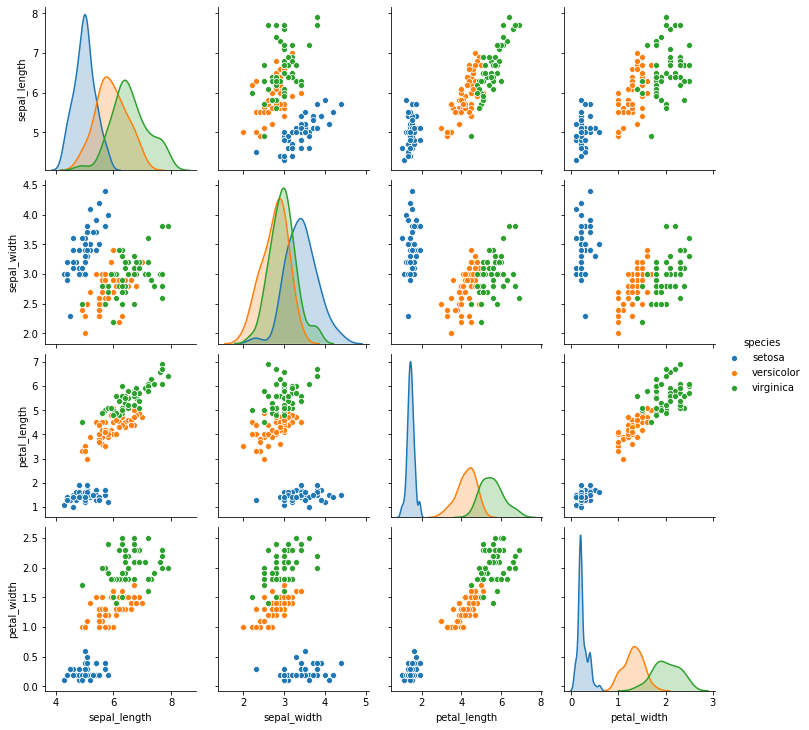

In [19]:
sns.pairplot(df, hue = "species");

<font color='blue'> Eksenin ilk basamağındaki dağılım grafiğine baktığımızda burada 3 tepeli bir yapı var. Demek ki bu değişkenlerin aralarındaki ilişkiyi açıklamak için species değişkeni ki biz bunun kendi içinde ayırt ediciliğini biliyoruz, çünkü her türün kendi içinde çeşitli teknik özellikleri var. Bu değişkenler bu çiçeklerin teknik özelliklerini ifade ediyor. Dolayısıyla ayrıştırıcılığını teorik olarak bildiğimiz bir durumu da tersten doğrulayabiliyoruz. Her grafikte 3 farklı kümelenme olduğunu görüyoruz.       </font>

<font color='blue'> İşaretleme şekillerini değiştirebiliriz: </font>

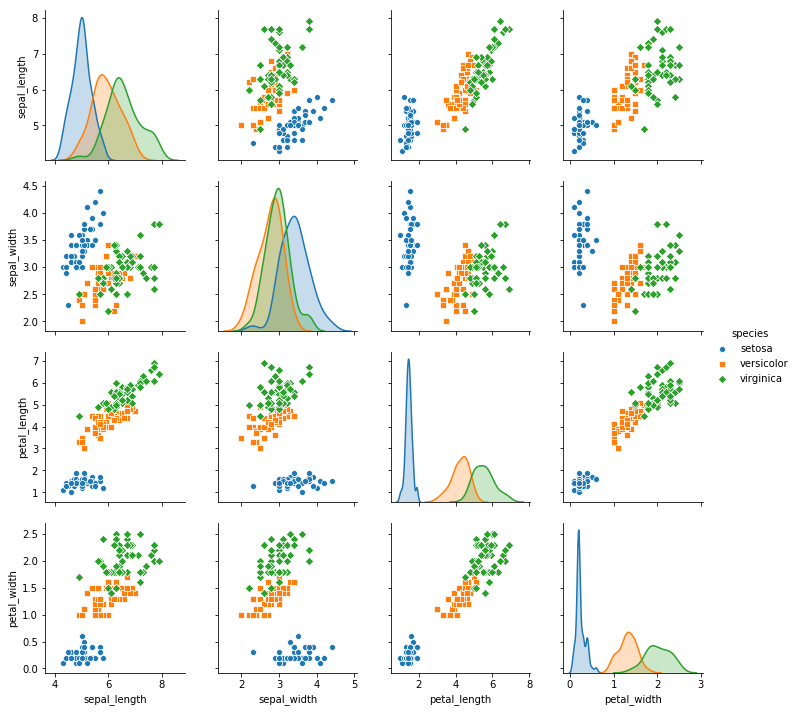

In [6]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

<font color='blue'> Grafiğe doğru ekleme işlemini ele alalım: </font>

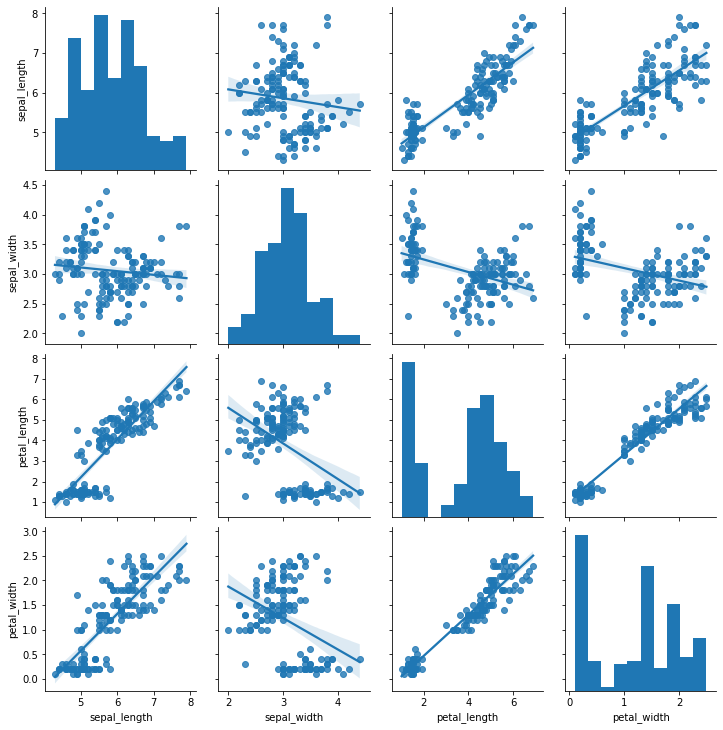

In [20]:
sns.pairplot(df, kind = "reg");

<font color='blue'> Burada bütün grafikler için her birisine doğru ekledi. Türlere göre ayırırsak: </font>

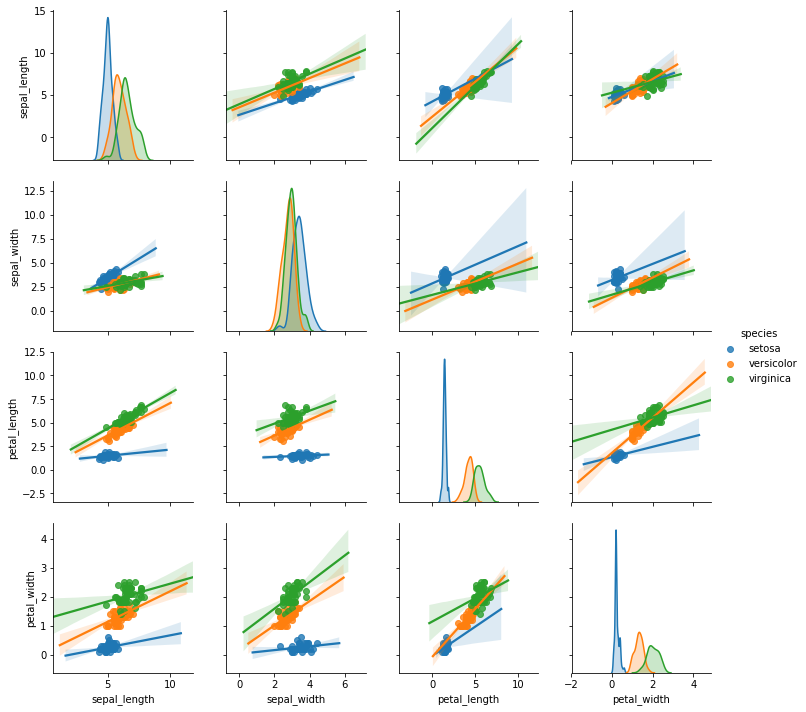

In [9]:
sns.pairplot(df, kind = "reg", hue = "species");

<font color='blue'> Yeşil ve turuncu türleri göz önünde bulundurduğumuzda "petal_length" ve "sepal_length" çok kuvvetli pozitif yönlü bir korelasyon var. Fakat setosa türü göz önünde bulundurulduğunda bu ilişkinin olmadığı gözlemleniyor. Eğim yok, neredeyse sıfır.   </font>

# Heatmap

<font color='blue'> Heatmap, uzun vadeli verilerde yani içerisinde zaman serisi verileri olduğunda yani yıl ve ay gibi değişkenler olduğunda, bu dönemlere karşılık gözlemlenebilecek olan bazı sayısal değişken değerleri olduğunda ya da bunun dışında daha büyük ölçekli belirli periyotlarla tekrar eden olayları görmek istediğimizde bize çok güzel bilgiler sunan bir grafiktir. Sadece zamansal bağlamda değil, eğer elimizde çok sınıflı kategorik bir değişken ve bunu belirli bir sayısal değişken açısından görselleştirme ihtiyacımız varsa bu durumda da çok işe yaramaktadır.      </font>

## Veri Seti Hikayesi

In [22]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<font color='blue'> Bu veri setinde yıllara ve aylara göre yolcu sayıları yer almaktadır. </font>

In [23]:
df.shape

(144, 3)

In [25]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [24]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

<font color='blue'>Elimizdeki bu veri yüksek ihtimalle zamana göre değişim gösterdiğinden dolayı buradaki ortalama, standart sapma ve diğer değerlerin değerlendirilirken göz önünde bu durumun da bulundurulması gerekir. Çünkü uçuş trendi incelendiğinde insanların yıllara göre havaalanlarını, uçak yolculuğunu kullanma durumları incelendiğinde burada zaten artan bir trend olacaktır. Trendin etkilerinin de göz önünde bulundurulup bu tip zamana bağlı değişkenler söz konusu olduğunda yorumlamaları bu durumu da düşünerek yapmak lazım.      </font>

<font color='blue'> Bu veri setini pivot tekniğiyle biraz daha okunabilir bir formata getirmek istediğimizi düşünelim. Pivot table aracılığıyla yılları ve ayları iki boyutta kabul ederek bunu daha yapısal bir formda görebiliriz. Kullanacak olduğumuz heatmap fonksiyonu da bizden böyle bir beklenti içerisinde.       </font>

In [27]:
df = df.pivot("month", "year", "passengers"); # İlki row, ikincisi columnu, üçüncüsü kesişimlerini ifade ediyor. 

In [28]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


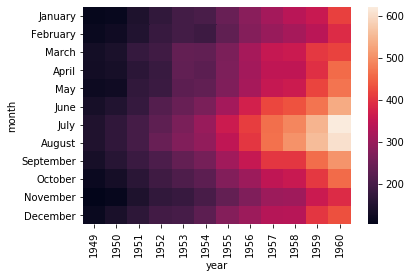

In [29]:
sns.heatmap(df);

<font color='blue'>Isı haritası elimizde pattern detection olduğunda yani 'yapı saptamak' problemleri olduğunda çok güzel işlevler görebilen fonksiyonlardır. Yıllar bazında grafiğe baktığımızda sağa doğru gittikçe bir aydınlanma var. Yıllar geçtikçe insanların havayolu tercihinin arttığını görüyoruz. Her yılı kendi içerisinde incelediğimizde orta tarafa odaklanacak olursak buradaki açık yıllarda en fazla renge sahip olan değerler burada gözlemleniyor. Hangi aylara denk geldiğine baktığımızda Haziran, Temmuz, Ağustos ki bu da içgüdüye uygun.       </font>

<font color='blue'> Hücreleri kendi değerleriyle doldurmak istediğimizde `annot = True`, `fmt = "d"`argümanlarını giriyoruz. </font>

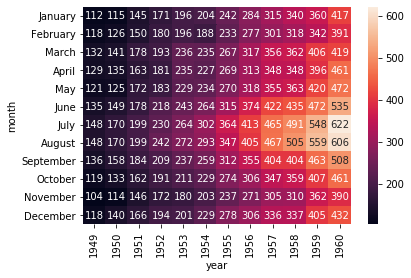

In [30]:
sns.heatmap(df, annot = True, fmt = "d");

<font color='blue'> Rakamlar birbirlerine çok yakın olduğundan okumakta zorlanabiliyoruz. Bunları birbirinden ayırmak için `linewidths = .5` argümanını ekledik.</font>

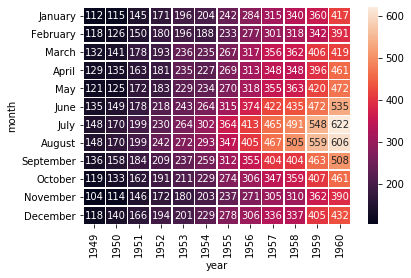

In [37]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = 0.5);

<font color='blue'> Sağ taraftaki renk paletini kaldırmak istersek `cbar = False` argümanını ekliyoruz. Eklememek daha mantıklı.</font>

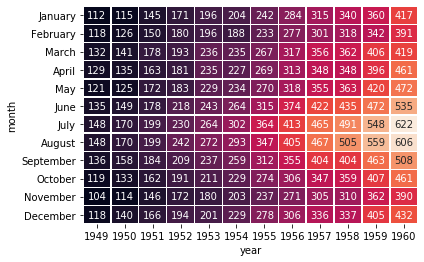

In [38]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

# Çizgi Grafik

<font color='blue'> Çizgi grafik, grafik teknikleri arasında görece diğerlerine göre daha zor problemlerde kullanacak olduğumuz bir veri görselleştirme türü. Zamana bağlı değişkenlerin olduğu veri setlerinde ve nesnelerin interneti gibi senaryolarda makinelerin ürettiği verileri görselleştirmek için kullanabileceğimiz bir veri görselleştirme tekniğidir. Burada kullanacağımız veri seti biraz daha iş bilgisini bilmediğimiz fakat üzerinde basit betimlemeler, tanımlamalar yapabileceğimiz bir veri seti.     </font>

## Veri Seti Hikayesi

In [39]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<font color='blue'> "fmri" denilen bir veri seti beyne bağlanan bir cihaz aracılığıyla toplanan sinyalleri ifade ediyor. 
    
- **subject** verilerin toplandığı kişileri ifade ediyor, 
- **timepoint** zaman noktalarını ifade ediyor, 
- **event**: burada birbirinden farklı olaylar var verinin toplanmasıyla ilgili, 
- **region** sinyalin toplandığı bölgeyi ifade ediyor.
- **signal** ise gelen sinyali ifade ediyor.    </font>

In [145]:
df.shape

(53940, 10)

<font color='blue'> "subject"in, "event"in, "region"ın kategorik değişken, diğer "timepoint" ve "signal" değişkenlerinin ise sayısal değişken olduğunu görebiliyoruz. "timepoint" değişkeninin aslında kesikli bir sayısal değişken ve kategorik bir değişkenmişçesine muamele görebilecek bir değişken. Zaman noktalarını mutlak olarak ifade ediyor. Dolayısıyla burada en çok odaklanacak olduğumuz "signal" değişkeni var. Sinyallerin ölçümleri üzerinden bazı farklılıkların yakalanmaya çalışılması gibi anomaly detection çalışmaları gibi çalışmaların yapılabileceği bir veri seti. Ama biz nesnelerin interneti verileriymiş gibi görselleştirme çalışması yapacağız.    </font>

<font color='blue'> Temelden amacımızı belirleyip buna yönelik olarak incelersek: örneğin amacımız her bir "timepoint" yani zaman noktasına göre signalin durumunu gözlemlemek olsun. Sonrasında çaprazlama işlemleriyle birlikte de buradaki diğer değişkenleri de boyut olarak veri setine eklemek isteyelim.</font>

In [42]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

<font color='blue'> 0 ile 18 arasında bir değişim söz konusu. Aralarda hiçbir ondalıklı ifade yok standart sapma dışında. Bu time noktalarının kesikli olduğu anlamına gelir. Mutlak bir değere sahip olduğu anlamına gelir. Bunlar istenirse kategorik değişkenmişçesine de değerlendirilebilir. Burada 0 ile 18 arasında eğer mean 9 ise bu aslında timepoint değişkeninin bütün **subject** yani gözlem birimlerinin her birisi için eşit olabileceği sorusunu hemen bir sorduruyor.    </font>

In [43]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

<font color='blue'> Standart sapma meane göre çok yüksek. Ölçek küçük olabilir, ama kendi ölçeği içerisinde bu değerler oldukça büyük. </font>

<font color='blue'>Bir soru aklımıza gelmişti. Genelde böyle veri setleri geldiğinde ilk ilgilendiğimiz konu tekillik olur. Yani unique değerlere bakmak olur. Acaba burada subjectler unique mi tekil mi, her biri için ayrı bir timepoint mi var bu şekilde veriyi tanımamız gerekiyor.    </font>

<font color='blue'>Her bir zaman noktasında acaba eşit sinyal mi var?    </font>

In [5]:
df.groupby("timepoint")["signal"].count()  # sinyalleri sayıyor

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

<font color='blue'>Demek ki her bir zaman noktasına göre eşit sayıda sinyal toplanmış. Bu durumu tersinden düşündüğümüzde her bir sinyalin eşsiz olmasını bekleriz. Tersinden yazdırdığımızda bunu: </font>

In [48]:
df.groupby("signal")["timepoint"].count()

signal
-0.255486    1
-0.238474    1
-0.224351    1
-0.181241    1
-0.178510    1
            ..
 0.455575    1
 0.460896    1
 0.476055    1
 0.494787    1
 0.564985    1
Name: timepoint, Length: 1064, dtype: int64

<font color='blue'>Bu şekilde tam göremedik. "timepoint"i ortadan kaldırdığımızda görebiliyoruz.</font>

In [49]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


<font color='blue'>Zaten toplamda 1064 gözlemimiz vardı. Sinyal gruplandığında grup sayısı da 1064 olunca buradan bunların her birinin tekil olduğu bilgisine erişebiliyoruz.  </font>

<font color='blue'>Bu gruplama içerisindeki genel istatistikleri inceleyelim.  </font>

In [50]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


<font color='blue'>Birbirlerinden farklılaşan standart sapma var. Demek ki ortalama etrafındaki durumlar birbirlerine göre değişebiliyor. Demek ki bu değişimi de oluşturan bazı yapılar var. Standart sapması 0.03 olan timepoint de var, 0.1 olan da. Bu arka tarafta aslında bir bilgi taşındığını, bunun farklı değişkenlerce açıklanabileceği anlamına geliyor.     </font>

## Çizgi Grafik ve Çaprazlamalar

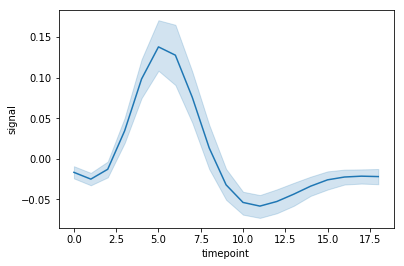

In [9]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

<font color='blue'>Grafiğe baktığımızda zaman noktalarına göre sinyallerin artış ve azalışıyla ilgili bir bilgi sunulmuş. Çizgi olarak gördüğümüz kısım ortalama değerlere karşılık geliyor. Her birisinde 56 tane gözlem var. Daha açık mavi noktalarla ifade edilen kısım da standart sapmalarla oluşturulmuş güven aralıklarını ifade ediyor. Bu kısımların bazı timepointlerde genişlediğini bazı kısımlarda da daraldığını görüyoruz. Her bir zaman noktasında 56 değer var. Bu 56 tane değer farklı farklı kişilere ait. Bu kişilerin her bir zaman noktasında üretmiş olduğu sinyallerin ortalamaları mavi çizgiler, standart sapmaları göz önünde bulundurularak oluşturulan aralıklar mavi değerler ise güven aralıkları.</font>

<font color='blue'>Çaprazlama işlemi yaptığımızda mesela buraya veri seti içerisinde bulunan bir kategorik değişkeni ekleyelim.  </font>

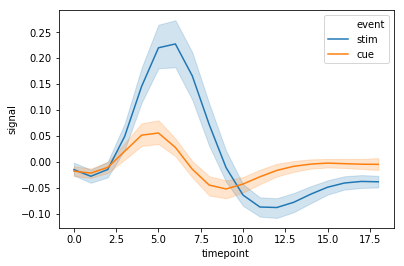

In [10]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

<font color='blue'>Grafiğin yukarıda ve aşağıda peak yapan noktalarını oluşturan şey bir kategorik değişken eklenerek daha açıklanabilir bir hale geldi.   </font>

<font color='blue'>Şu anda üzerinde çalıştığımız veri seti yapısal bir veri seti, mekanik, teknik bir veri seti. Nesnelerin interneti gibi senaryolarda veri setleri nedensellik bağlamında bilgi taşımasa da meydana gelen yapıların neden bu şekilde olduğunu yapısal anlamda söyleyebiliyor.</font>

<font color='blue'>Nesnelerin ürettiği verilerde genelde zamana bağlı ve event dediğimiz olaylara bağlı şekilde oluşur. Örneğin IOT dediğimiz nesnelerin interneti dediğimiz alanda bir şirkete girdik. Bu şirketin çeşitli süreçlerinde bazı cihazlar kontrol ediliyor. Bunlar çok yüksek bir ihtimalle zamana göre kontrol edilecek, örneğin makinanın bir parçasının değiştirilmesi için verilen bir ara bir olay olacak, örneğin makinaya yeni bir mal geldiğinde bu malın entegre edilmesi, yüklenmesi süreci bir olay olacak. Bu tip olaylar bazı süreçleri etkileyip değiştiriyor olacak.      </font>

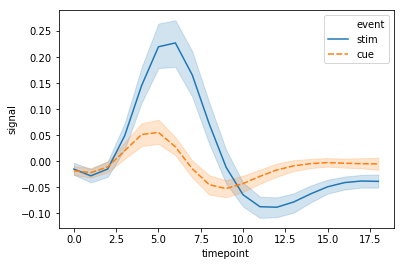

In [11]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

<font color='blue'>Çizgiler ortalamayı ifade ediyordu. Buradaki ortalamaları ifade eden noktaları belirginleştirmek isteyelim. `markers = True, dashes = False` bunu sağlıyor.  </font>

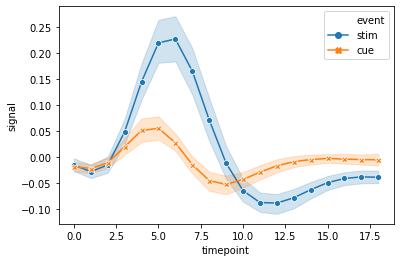

In [53]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df);

<font color='blue'>Bir boyut daha eklemek istiyoruz diyelim `hue = "region"` koduyla. </font>

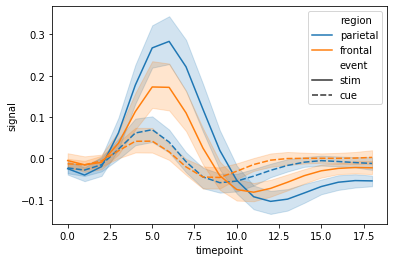

In [54]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);

# Basit Zaman Serisi Grafiği

<font color='blue'>Eğer veri setin içerisinde bir zamana bağlı değişken, birkaç kategorik değişken varsa veya buna benzer işlemler yapılması gerekiyorsa bunlara da boyut ekleme işlemi yapabiliriz.   </font>

<font color='blue'>Veri setini indirebilmek için "pandas_datareader" kütüphanesini  yükledik. İstediğimiz modül anaconda içerisinde yer almadığı zamanlar bunu yapıyoruz.</font>

In [2]:
!pip install pandas_datareader 
import pandas_datareader as pr 

<font color='blue'>Veri setimiz Apple'ın borsadaki hisse senedi değerlerini içeriyor. Bu veri zaman serisi verisi. </font>

In [3]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2019-08-25") # AAPL: Apple'ın hisse senedi değerlerini istiyoruz.

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.286833
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.678219
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.214844
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.235069
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.352642


In [5]:
df.shape

(917, 6)

<font color='blue'>Biz burada bir tanesine odaklanıp odaklanmış olacağımız değer üzerinden görselleştirme işlemini yapacağız. </font>

In [6]:
kapanis = df["Close"]

In [7]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

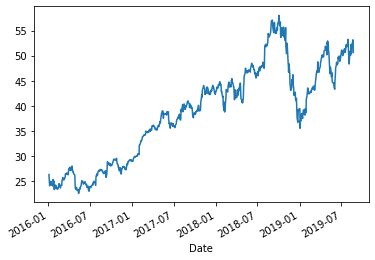

In [8]:
kapanis.plot();

<font color='blue'>Elimizdeki tarih değişkeninin bir tarih değişkeni olduğunu tanımlamamız gerekiyor aynı kategorik değişkenlerde çalışırken nominal ve ordinal farkını ifade ettiğimiz gibi. Burada zaman değişkeni dediğimiz değerimiz indeximizde. İndexte gömülü olan değeri zaman değeri olarak yine de bir zaman değeri olarak ifade edelim sanki bu problemle karşılaşmış gibi.    </font>

In [9]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [11]:
import pandas as pd

In [12]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [13]:
kapanis.head() # biz zaten önceden de problemsiz bir şekilde okumuştuk.

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

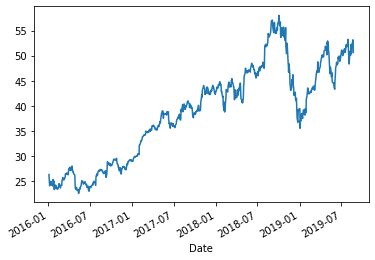

In [15]:
kapanis.plot();

<font color='blue'>Eğer veri setin içerisinde bir zamana bağlı değişken, birkaç kategorik değişken ve buna benzer işlemler yapılması gerekiyorsa bunlara da boyut ekleme işlemi yapabiliriz.   </font>

# Bölüm Sonu Değerlendirmesi

Dağılım Grafikleri

Korelasyon Grafikleri

Çizgi Grafik

Basit Zaman Serisi 